# 1 Basic python

## 1.1 How to insert two (or $N$) things into a string?

In [1]:
x = 'hello'
y = 2

In [2]:
s1 = 'a string %s with two %d insertions' % (x, y)
s1

'a string hello with two 2 insertions'

In [3]:
s2 = 'a string {} with two {} insertions'.format(x, y)
s2

'a string hello with two 2 insertions'

In [4]:
s3 = f'a string {x} with two {y} insertions'
s3

'a string hello with two 2 insertions'

# 2 Shapely

## 2.1 How to display two things at once

In [5]:
from shapely.geometry import Point, LineString, Polygon

In [6]:
p = Point(0, 0)
p1 = Point(1, 1)
p2 = Point(2, 3)
p3 = Point(4, -2)
circle = p.buffer(1.0)
line = LineString([p1, p2, p3])
rectangle = Polygon([(-2,-2), (2, -2), (2, 0), (-2, 0)])

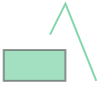

In [7]:
two_things = line.union(rectangle)
two_things

## 2.2 How to do simple geometric operations

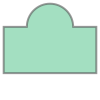

In [8]:
rectangle.union(circle)

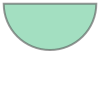

In [9]:
rectangle.intersection(circle)

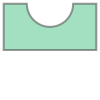

In [10]:
rectangle.difference(circle)

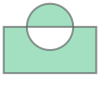

In [11]:
rectangle.symmetric_difference(circle)

# 3 Pandas

## 3.1 The counterintuitive behavior of copies and views

Taken from here: highly recommended reading!: https://www.practicaldatascience.org/html/views_and_copies_in_pandas.html

In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.DataFrame({'a':np.arange(4), 'b':np.arange(4)})
df

,a,b
0,0,0
1,1,1
2,2,2
3,3,3


In [14]:
my_slice = df.iloc[1:3,]
my_slice

,a,b
1,1,1
2,2,2


This change propagates:

In [15]:
df.iloc[1,1] = -1
df

,a,b
0,0,0
1,1,-1
2,2,2
3,3,3


In [16]:
my_slice

,a,b
1,1,-1
2,2,2


But this one does not!

In [17]:
df.iloc[1,0] = 3.14
df

,a,b
0,0.00,0
1,3.14,-1
2,2.00,2
3,3.00,3


In [18]:
my_slice

,a,b
1,1,-1
2,2,2


## 3.2 Different types of sort in pandas

The pandas documentation (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

tells us for the argument `kind` of `sort_values`:

kind{‘quicksort’, ‘mergesort’, ‘heapsort’}, default ‘quicksort’

    Choice of sorting algorithm. See also ndarray.np.sort for more information. mergesort is the only stable algorithm. For DataFrames, this option is only applied when sorting on a single column or label.


The following example is taken from this **very comprehensive** post: https://realpython.com/pandas-sort-python/

The `vehicles.csv` comes from here: https://www.fueleconomy.gov/feg/epadata/vehicles.csv

In [19]:
column_subset = [
    "id",
    "make",
    "model",
    "year",
    "cylinders",
    "fuelType",
    "trany",
    "mpgData",
    "city08",
    "highway08"
    ]

We are reading the `.csv` directly from disk as directly loading from the the webpage as in the example was a bit slow. If you want to load it directly, replace `"vehicles.csv"` with `"https://www.fueleconomy.gov/feg/epadata/vehicles.csv"` below

In [20]:
df = pd.read_csv(
    "vehicles.csv",
    usecols=column_subset,
    nrows=100
    )

In [21]:
df

,city08,cylinders,fuelType,highway08,id,make,model,mpgData,trany,year
0,19,4,Regular,25,1,Alfa Romeo,Spider Veloce 2000,Y,Manual 5-spd,1985
1,9,12,Regular,14,10,Ferrari,Testarossa,N,Manual 5-spd,1985
2,23,4,Regular,33,100,Dodge,Charger,Y,Manual 5-spd,1985
3,10,8,Regular,12,1000,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,1985
4,17,4,Premium,23,10000,Subaru,Legacy AWD Turbo,N,Manual 5-spd,1993
...,...,...,...,...,...,...,...,...,...,...
95,17,6,Regular,25,10083,Pontiac,Grand Prix,Y,Automatic 3-spd,1993
96,17,6,Regular,27,10084,Pontiac,Grand Prix,N,Automatic 4-spd,1993
97,15,6,Regular,24,10085,Pontiac,Grand Prix,N,Automatic 4-spd,1993
98,15,6,Regular,24,10086,Pontiac,Grand Prix,N,Manual 5-spd,1993


In [22]:
df.sort_values(
    by="city08",
    ascending=False,
    kind="quicksort"
)

,city08,cylinders,fuelType,highway08,id,make,model,mpgData,trany,year
9,23,4,Regular,30,10005,Toyota,Corolla,Y,Automatic 4-spd,1993
2,23,4,Regular,33,100,Dodge,Charger,Y,Manual 5-spd,1985
7,23,4,Regular,26,10003,Toyota,Corolla,Y,Automatic 3-spd,1993
8,23,4,Regular,31,10004,Toyota,Corolla,Y,Manual 5-spd,1993
76,23,4,Regular,31,10066,Mazda,626,Y,Manual 5-spd,1993
...,...,...,...,...,...,...,...,...,...,...
58,10,8,Regular,11,1005,Dodge,B350 Wagon 2WD,N,Automatic 3-spd,1985
80,9,8,Regular,10,1007,Dodge,B350 Wagon 2WD,N,Automatic 3-spd,1985
1,9,12,Regular,14,10,Ferrari,Testarossa,N,Manual 5-spd,1985
47,9,8,Regular,11,1004,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,1985


In [23]:
df.sort_values(
    by="city08",
    ascending=False,
    kind="mergesort"
)

,city08,cylinders,fuelType,highway08,id,make,model,mpgData,trany,year
2,23,4,Regular,33,100,Dodge,Charger,Y,Manual 5-spd,1985
7,23,4,Regular,26,10003,Toyota,Corolla,Y,Automatic 3-spd,1993
8,23,4,Regular,31,10004,Toyota,Corolla,Y,Manual 5-spd,1993
9,23,4,Regular,30,10005,Toyota,Corolla,Y,Automatic 4-spd,1993
10,23,4,Regular,30,10006,Toyota,Corolla,Y,Manual 5-spd,1993
...,...,...,...,...,...,...,...,...,...,...
69,10,8,Regular,11,1006,Dodge,B350 Wagon 2WD,N,Automatic 3-spd,1985
1,9,12,Regular,14,10,Ferrari,Testarossa,N,Manual 5-spd,1985
47,9,8,Regular,11,1004,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,1985
80,9,8,Regular,10,1007,Dodge,B350 Wagon 2WD,N,Automatic 3-spd,1985
